In [18]:
#1 data selection

print("step 1: data selection")
import pandas as pd

# Load the Dataset
df = pd.read_csv("loan_data.csv")
print("dataset loaded successfully.")
print(f"initial dataset shape: {df.shape}")

step 1: data selection
dataset loaded successfully.
initial dataset shape: (45000, 14)



step 2: data preprocessing
after dropping missing values and duplicates: (45000, 14)
after outlier removal: (37659, 14)

visualizing outlier removal...


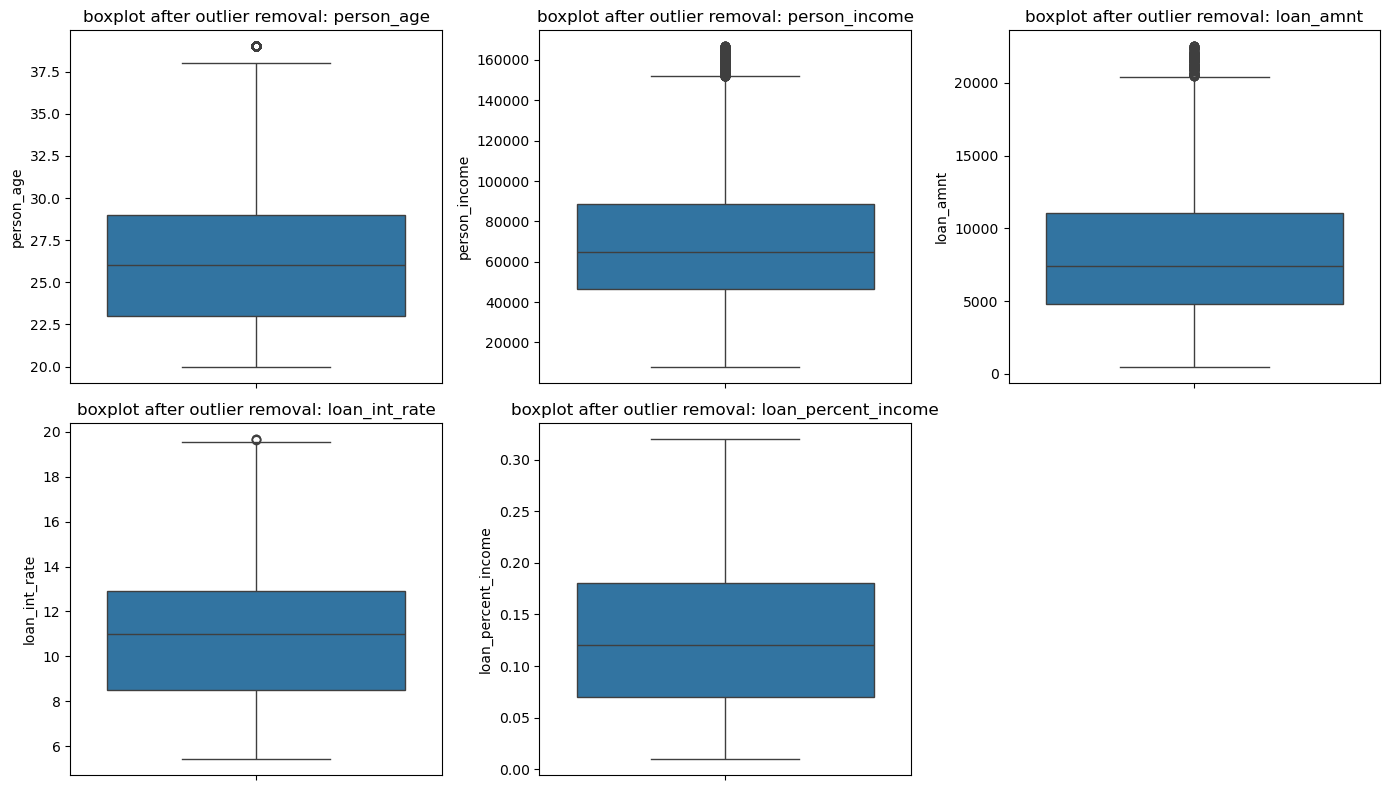

In [19]:
#2 data preprocessing 
print("\nstep 2: data preprocessing")

#2.1. handle missing values and duplicates
df = df.dropna().drop_duplicates()
print(f"after dropping missing values and duplicates: {df.shape}")

# 2.2. outlier removal using IQR method
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("after outlier removal:", df.shape)

# visualization of outlier removal
print("\nvisualizing outlier removal...")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot after outlier removal: {col}")
plt.tight_layout()
plt.show()


In [20]:
#3. data transformation
print("\nstep 3: data transformation")

# one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership',
                                 'loan_intent', 'previous_loan_defaults_on_file'], drop_first=True)

# define features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Feature Scaling
print("scaling features...")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#splitting data into train and test sets
print("splitting data into train and test sets...")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=6)


step 3: data transformation
scaling features...
splitting data into train and test sets...


In [21]:
#4. data mining
print("\nStep 4: data mining")

# logistic regression model
print("training logistic regression...")
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Random Forest Model
print("training random forest...")
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=6)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]


Step 4: data mining
training logistic regression...
training random forest...



step 5: model evaluation

logistic regression metrics:
accuracy: 0.897238449283059
precision: 0.7488021902806297
recall: 0.7288474350433045
f1-score: 0.7386900742741391
cohen kappa score: 0.6747482211144005
ROC-AUC Score: 0.9515391883220286
confusion matrix:
 [[5664  367]
 [ 407 1094]]

random forest metrics:
accuracy: 0.928040361125863
precision: 0.8772619984264359
recall: 0.7428381079280479
f1-score: 0.8044733044733045
cohen cappa score: 0.7607510260993829
ROC-AUC Score: 0.9710704111369517
confusion matrix:
 [[5875  156]
 [ 386 1115]]

plotting ROC curves...


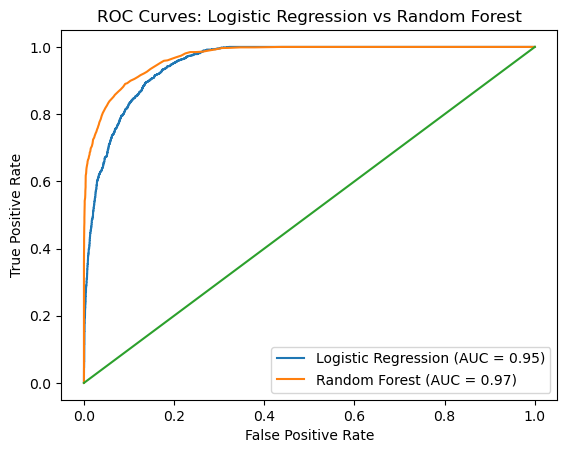

In [28]:
#5. Evaluation
print("\nstep 5: model evaluation")
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, cohen_kappa_score
)

# logistic Regression Metrics
print("\nlogistic regression metrics:")
print("accuracy:", accuracy_score(y_test, y_pred_log))
print("precision:", precision_score(y_test, y_pred_log))
print("recall:", recall_score(y_test, y_pred_log))
print("f1-score:", f1_score(y_test, y_pred_log))
print("cohen kappa score:", cohen_kappa_score(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_log))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_log))

# random Forest metrics
print("\nrandom forest metrics:")
print("accuracy:", accuracy_score(y_test, y_pred_rf))
print("precision:", precision_score(y_test, y_pred_rf))
print("recall:", recall_score(y_test, y_pred_rf))
print("f1-score:", f1_score(y_test, y_pred_rf))
print("cohen cappa score:", cohen_kappa_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC Curves
print("\nplotting ROC curves...")
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_log)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Logistic Regression vs Random Forest")
plt.legend()
plt.show()


step 6: knowledge representation
visualizing feature importances for random forest...


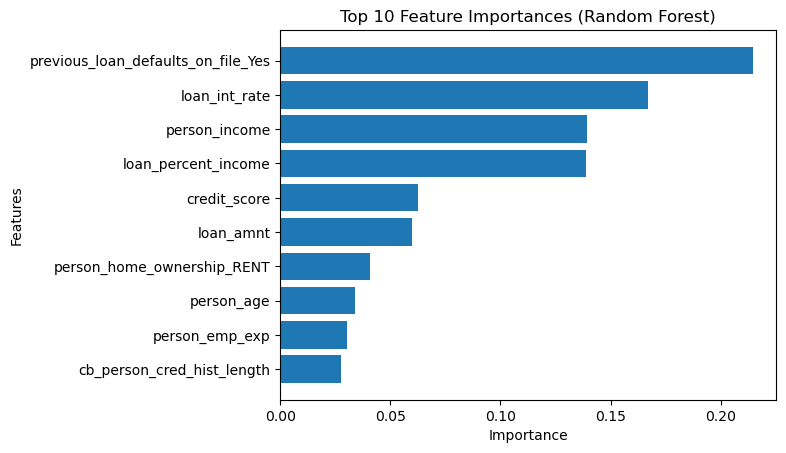

visualizing coefficients for Logistic Regression...


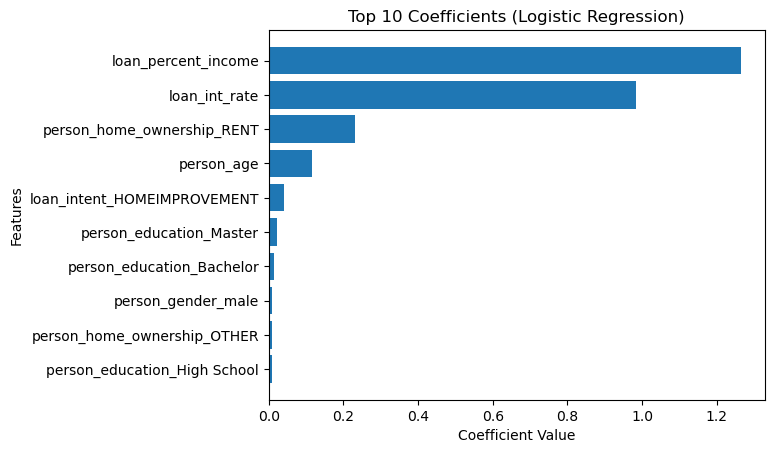


Knowledge Discovery Process Complete.

Visualizing Actual vs Predicted Classes for 20 Samples...


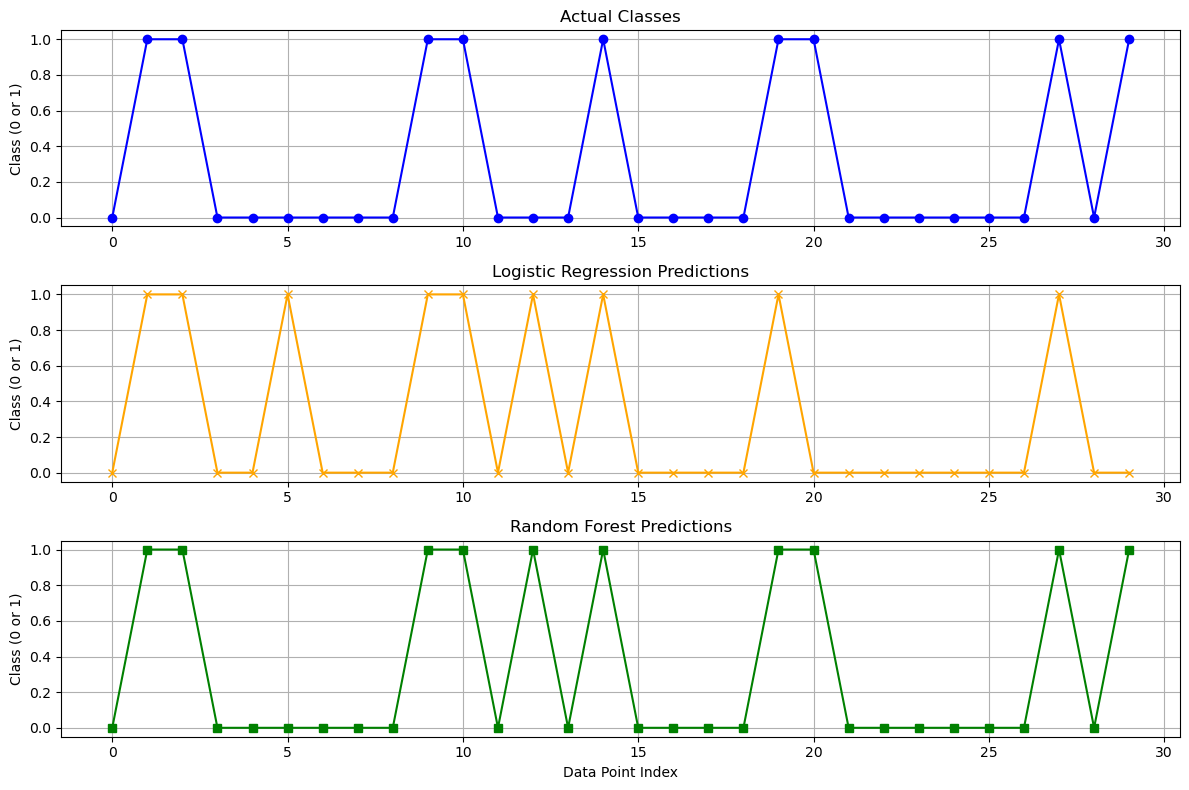

In [37]:
# 6. Knowledge Representation
print("\nstep 6: knowledge representation")
# random forest feature importance
print("visualizing feature importances for random forest...")
importances = rf_clf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.barh(rf_importance_df['Feature'][:10], rf_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

# Logistic Regression Coefficients
print("visualizing coefficients for Logistic Regression...")
coefficients = log_reg.coef_[0]
logistic_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

plt.barh(logistic_importance_df['Feature'][:10], logistic_importance_df['Coefficient'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Top 10 Coefficients (Logistic Regression)")
plt.show()

print("\nKnowledge Discovery Process Complete.")


# Step 6: Knowledge Representation (Continued)
print("\nVisualizing Actual vs Predicted Classes for 3S0 Samples...")
import random

num_samples = 30
sample_indices = random.sample(range(len(y_test)), num_samples)

# Extract the corresponding samples
y_actual_sample = y_test.iloc[sample_indices].values
y_pred_log_sample = y_pred_log[sample_indices]
y_pred_rf_sample = y_pred_rf[sample_indices]

import matplotlib.pyplot as plt

# Plot Actual vs Predicted Classes Separately
plt.figure(figsize=(12, 8))

# Subplot 1: Actual Values
plt.subplot(3, 1, 1)
plt.plot(range(num_samples), y_actual_sample, label='Actual', color='blue', marker='o', linestyle='-')
plt.title("Actual Classes")
plt.ylabel("Class (0 or 1)")
plt.grid(True)

# Subplot 2: Logistic Regression Predictions
plt.subplot(3, 1, 2)
plt.plot(range(num_samples), y_pred_log_sample, label='Logistic Regression Predicted', color='orange', marker='x', linestyle='-')
plt.title("Logistic Regression Predictions")
plt.ylabel("Class (0 or 1)")
plt.grid(True)

# Subplot 3: Random Forest Predictions
plt.subplot(3, 1, 3)
plt.plot(range(num_samples), y_pred_rf_sample, label='Random Forest Predicted', color='green', marker='s', linestyle='-')
plt.title("Random Forest Predictions")
plt.xlabel("Data Point Index")
plt.ylabel("Class (0 or 1)")
plt.grid(True)
plt.tight_layout()
plt.show()
